<a href="https://colab.research.google.com/github/Bnovo14/CienciaDados/blob/main/ProjetoCienciaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados: Doenças Cardíacas
---
## Breve Descrição do Conjunto de Dados

Este projeto utiliza o conjunto de dados **Heart Disease UCI**, originado da **Cleveland Clinic Foundation** e amplamente utilizado na comunidade de Machine Learning.

O objetivo principal é aplicar a **Análise Exploratória de Dados (AED)** para compreender as variáveis, identificar padrões e levantar hipóteses que possam levar à construção de um futuro modelo preditivo, capaz de classificar pacientes com ou sem doença cardíaca.

Após o processo de limpeza e pré-processamento dos dados, a base de dados final utilizada nesta análise conta com **541 registros** e **12 atributos**.

ETAPA DE LIMPEZA E PREPARAÇÃO DOS DADOS

Visão geral do DataFrame APÓS a limpeza:
<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 0 to 912
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       541 non-null    int64  
 1   sex       541 non-null    object 
 2   cp        541 non-null    object 
 3   trestbps  541 non-null    float64
 4   chol      541 non-null    float64
 5   fbs       541 non-null    object 
 6   restecg   541 non-null    object 
 7   thalch    541 non-null    float64
 8   exang     541 non-null    object 
 9   oldpeak   541 non-null    float64
 10  slope     541 non-null    object 
 11  target    541 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 54.9+ KB



PARTE 1: RESUMO QUANTITATIVO E DESCRIÇÃO DOS DADOS

Resumo estatístico das variáveis numéricas:
                 age    trestbps         chol      thalch     oldpeak
count     541.000000  541.000000   541.0

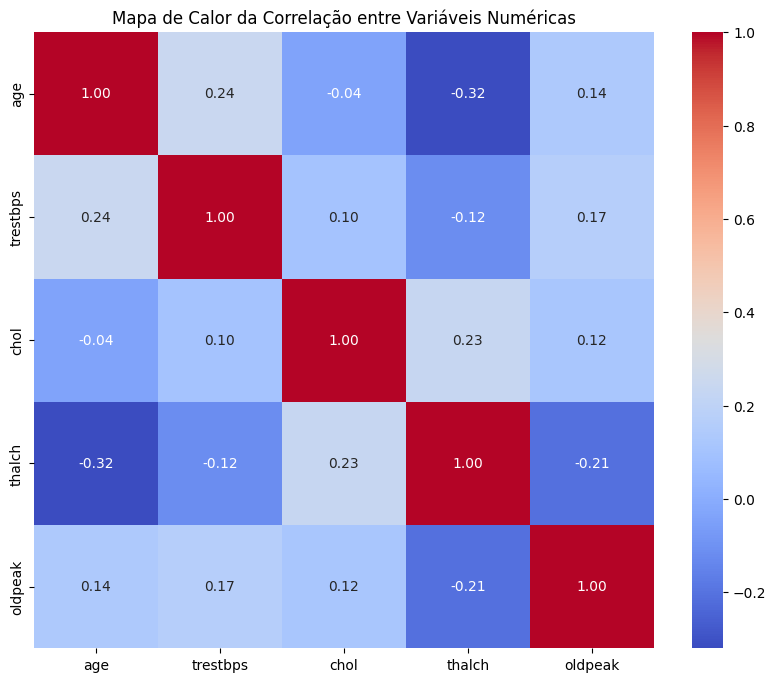


PARTE 3: VISUALIZAÇÃO GRÁFICA DOS DADOS

-> Gerando Histogramas para variáveis numéricas...


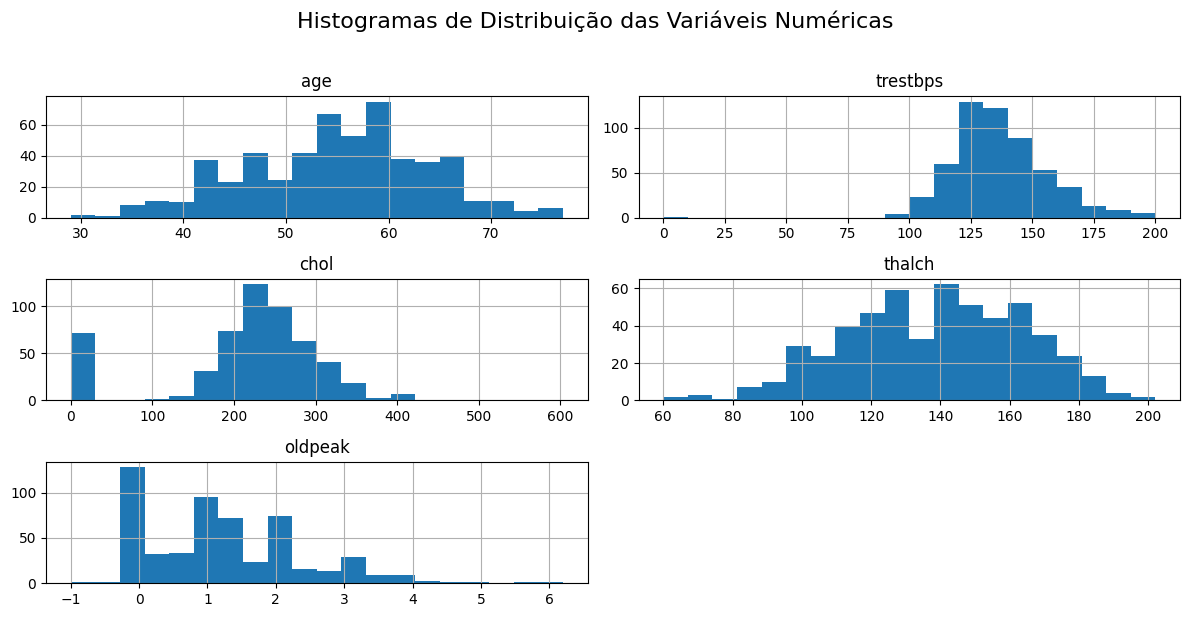



-> Gerando BoxPlots para variáveis numéricas...


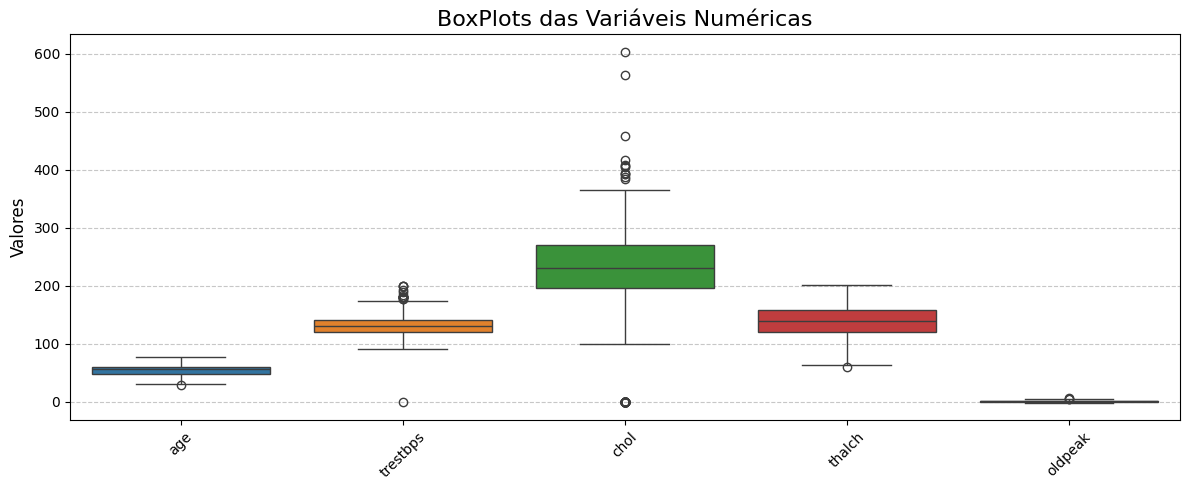



-> Gerando Diagrama de Dispersão (Idade vs. Freq. Cardíaca Máxima)...


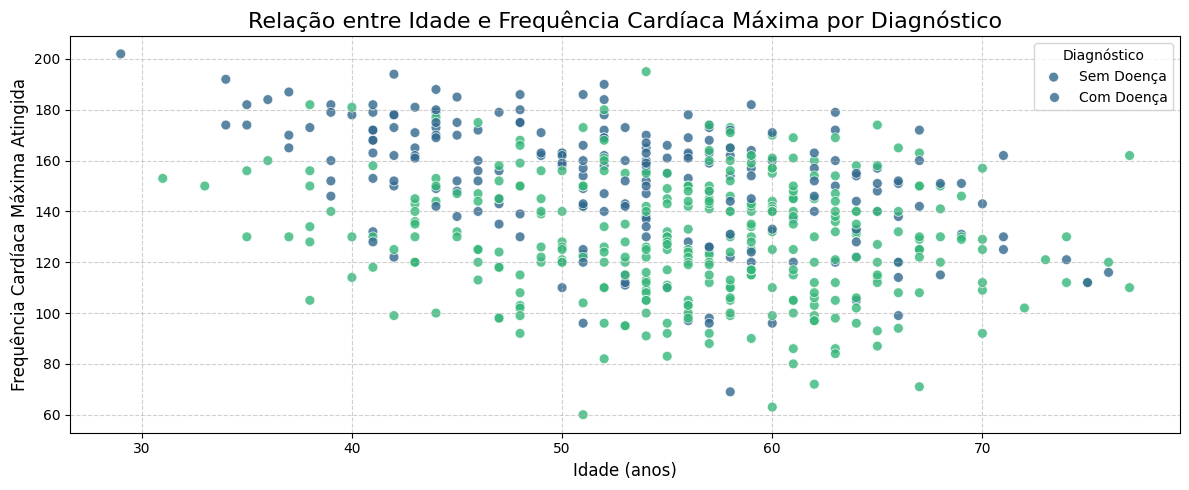


FIM DA VISUALIZAÇÃO!



In [3]:
# ==============================================================================
# Bloco 1: Importando as Bibliotecas e Carregando os Dados
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nome_do_arquivo = 'heart_disease_uci.csv'

# Carrega o arquivo CSV
df = pd.read_csv(nome_do_arquivo)


# ==============================================================================
# Bloco 2: Limpeza e Preparação dos Dados (NOVO!)
# ==============================================================================
print("="*60)
print("ETAPA DE LIMPEZA E PREPARAÇÃO DOS DADOS")
print("="*60 + "\n")

# --- CORREÇÃO DE NOMES E CRIAÇÃO DA VARIÁVEL ALVO ---
# A variável alvo 'num' indica o grau da doença (0 = sem doença, 1-4 = com doença).
# Vamos criar uma variável alvo binária (0 ou 1) que é mais fácil de usar,
# chamada 'target', como no exemplo anterior.
df['target'] = np.where(df['num'] > 0, 1, 0)

# A coluna 'ca' e 'thal' têm muitos valores faltantes e podem atrapalhar.
# Para esta análise, vamos remover as colunas com mais de 50% de dados faltantes.
# E também a coluna 'id', 'dataset' e 'num' original que não usaremos na análise.
df_limpo = df.drop(columns=['id', 'dataset', 'ca', 'thal', 'num'])

# --- TRATAMENTO DE VALORES FALTANTES ---
# Vamos preencher os valores faltantes das colunas numéricas com a mediana de cada coluna.
# A mediana é mais robusta a outliers do que a média.
colunas_com_nan = ['trestbps', 'chol', 'thalch', 'oldpeak']
for coluna in colunas_com_nan:
    mediana = df_limpo[coluna].median()
    df_limpo[coluna] = df_limpo[coluna].fillna(mediana)

# Removemos as linhas restantes que ainda possam ter algum dado faltante (em colunas categóricas)
df_limpo.dropna(inplace=True)

print("Visão geral do DataFrame APÓS a limpeza:")
df_limpo.info()
print("\n")


# ==============================================================================
# Parte 1: Resumo Quantitativo e Descrição dos Dados
# ==============================================================================
print("\n" + "="*60)
print("PARTE 1: RESUMO QUANTITATIVO E DESCRIÇÃO DOS DADOS")
print("="*60 + "\n")

# --- ANÁLISE DAS VARIÁVEIS QUANTITATIVAS ---
# Lista de colunas numéricas corrigida (thalch)
colunas_numericas = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
desc_stats = df_limpo[colunas_numericas].describe()

# Calcula as métricas que faltam
desc_stats.loc['variance'] = df_limpo[colunas_numericas].var()
desc_stats.loc['range'] = df_limpo[colunas_numericas].max() - df_limpo[colunas_numericas].min()
desc_stats.loc['IQR'] = desc_stats.loc['75%'] - desc_stats.loc['25%']
print("Resumo estatístico das variáveis numéricas:")
print(desc_stats)
print("\n")

# --- ANÁLISE DAS VARIÁVEIS QUALITATIVAS ---
print("--- Análise das Variáveis Qualitativas (Tabela de Frequência) ---")
colunas_categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'target']

for coluna in colunas_categoricas:
    print(f"\n----- Análise da Coluna: '{coluna}' -----")
    # Tabela de Frequência Absoluta
    print("> Frequência Absoluta:")
    print(df_limpo[coluna].value_counts())
    # Tabela de Frequência Relativa
    print("\n> Frequência Relativa (%):")
    freq_rel = df_limpo[coluna].value_counts(normalize=True) * 100
    print(freq_rel.round(2).astype(str) + '%')


# ==============================================================================
# Parte 2: Análise de Correlação (CORRIGIDO)
# ==============================================================================
print("\n" + "="*60)
print("PARTE 2: ANÁLISE DE CORRELAÇÃO")
print("="*60 + "\n")

correlation_matrix = df_limpo[colunas_numericas].corr()
print("Matriz de Correlação de Pearson:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Correlação entre Variáveis Numéricas')
plt.show()


# ==============================================================================
# Parte 3: Visualização dos Dados (COM FORMATAÇÃO MELHORADA)
# ==============================================================================
print("\n" + "="*60)
print("PARTE 3: VISUALIZAÇÃO GRÁFICA DOS DADOS")
print("="*60 + "\n")

# --- Histrogramas ---
# Este gráfico é uma grade, então ele precisa de um tamanho maior.
print("-> Gerando Histogramas para variáveis numéricas...")
df_limpo[colunas_numericas].hist(bins=20, figsize=(12, 6))
plt.suptitle('Histogramas de Distribuição das Variáveis Numéricas', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1]) # Ajusta o layout para evitar sobreposição
plt.show()

# Adiciona um separador visual no output
print("\n" + "="*80 + "\n")


# --- Diagramas de Caixa (BoxPlots) ---
# Definimos um tamanho padrão de figura para os próximos gráficos
tamanho_padrao_figura = (12, 5)

print("-> Gerando BoxPlots para variáveis numéricas...")
plt.figure(figsize=tamanho_padrao_figura)
sns.boxplot(data=df_limpo[colunas_numericas])
plt.title('BoxPlots das Variáveis Numéricas', fontsize=16)
plt.ylabel('Valores', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Adiciona um separador visual no output
print("\n" + "="*80 + "\n")


# --- Diagrama de Dispersão (Scatter Plot) ---
print("-> Gerando Diagrama de Dispersão (Idade vs. Freq. Cardíaca Máxima)...")
plt.figure(figsize=tamanho_padrao_figura)
sns.scatterplot(data=df_limpo, x='age', y='thalch', hue='target', palette='viridis', s=50, alpha=0.8)
plt.title('Relação entre Idade e Frequência Cardíaca Máxima por Diagnóstico', fontsize=16)
plt.xlabel('Idade (anos)', fontsize=12)
plt.ylabel('Frequência Cardíaca Máxima Atingida', fontsize=12)
plt.legend(title='Diagnóstico', labels=['Sem Doença', 'Com Doença'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


print("\n" + "="*60)
print("FIM DA VISUALIZAÇÃO!")
print("="*60 + "\n")

## Resultados das Métricas - Parte 1
---
## Resumo estatístico das variáveis numéricas:

| Métrica | age | trestbps | chol | thalch | oldpeak |
|:---|---:|---:|---:|---:|---:|
| **count** | 541.00 | 541.00 | 541.00 | 541.00 | 541.00 |
| **Média** (`mean`) | 54.84 | 133.34 | 216.14 | 138.25 | 1.23 |
| **Desvio Padrão** (`std`) | 8.88 | 18.95 | 98.98 | 25.82 | 1.10 |
| **Mínimo** (`min`) | 29.00 | 0.00 | 0.00 | 60.00 | -1.00 |
| **Q1 (25%)** | 49.00 | 120.00 | 197.00 | 120.00 | 0.10 |
| **Mediana (50%)** | 56.00 | 130.00 | 231.00 | 140.00 | 1.00 |
| **Q3 (75%)** | 61.00 | 142.00 | 271.00 | 158.00 | 2.00 |
| **Máximo** (`max`) | 77.00 | 200.00 | 603.00 | 202.00 | 6.20 |
| **Variância** (`variance`) | 78.82 | 358.99 | 9796.49 | 666.92 | 1.21 |
| **Amplitude** (`range`) | 48.00 | 200.00 | 603.00 | 142.00 | 7.20 |
| **IQR** | 12.00 | 22.00 | 74.00 | 38.00 | 1.90 |

#Resultados das Métricas - Parte 2
---
### Matriz de Correlação de Pearson
| Variável | age | trestbps | chol | thalch | oldpeak |
|:---|:---:|:---:|:---:|:---:|:---:|
| **age** | 1.00 | 0.24 | -0.04 | -0.32 | 0.14 |
| **trestbps** | 0.24 | 1.00 | 0.10 | -0.12 | 0.17 |
| **chol** | -0.04 | 0.10 | 1.00 | 0.23 | 0.12 |
| **thalch** | -0.32 | -0.12 | 0.23 | 1.00 | -0.21 |
| **oldpeak** | 0.14 | 0.17 | 0.12 | -0.21 | 1.00 |

## Análise Gráfica e Observações - Parte 3
---
### Análise dos Histogramas

A análise da distribuição de frequência das variáveis numéricas revela perfis distintos.
- A distribuição da **idade (`age`)** mostra uma maior concentração de pacientes na faixa entre 50 e 65 anos.
- A variável **colesterol (`chol`)**, por sua vez, apresenta uma distribuição assimétrica à direita, indicando que, embora a maioria dos pacientes tenha níveis moderados, uma minoria possui valores consideravelmente altos.
- A **frequência cardíaca máxima (`thalch`)** possui uma distribuição que se aproxima da normalidade, com um pico central bem definido.

## Conclusões e Próximos Passos

Esta primeira análise dos dados foi muito útil para entendermos o desafio do projeto. Com base no que observamos, chegamos aos seguintes pontos:

* **O que descobrimos:**
    * Vimos que o perfil da maioria dos pacientes é de homens (cerca de 76%) com idade média de 55 anos.
    * Um ponto de atenção foi ver que colunas como `chol` (colesterol) tinham valores mínimos de `0`, o que mostra que os dados do mundo real precisam de tratamento antes de usar.

* **Nossa Hipótese:**
    * Nossa principal suspeita é que algumas características como: **tipo de dor no peito (`cp`)**, serão muito importantes para criar um bom modelo de previsão.

* **Próximos Passos:**
    * Seguindo o que aprendemos, o próximo passo do projeto é a fase de **Modelagem**. Agora, vamos preparar os dados (transformando texto em número) e treinar os primeiros algoritmos de classificação para tentar prever o diagnóstico dos pacientes.